# Chapter 3 Wrangling Spike Trains

In [1]:
spike_train = [0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0]
len(spike_train)

21

In [3]:
light_onset_time = 5
spike_value = 1
latency_to_first_spike = spike_train[light_onset_time:].index(spike_value)
print(latency_to_first_spike)

4


In [4]:
spike_time = [i for i, x in enumerate(spike_train) if x == spike_value]
print(spike_time)

[9, 11, 13, 17]


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Time(in ms)')

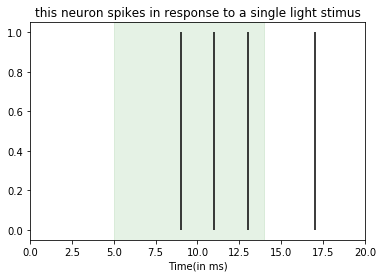

In [16]:
plt.subplot(111)
plt.vlines(spike_time, 0, 1)
plt.axvspan(5, 14, alpha = 0.1, color='g')
plt.xlim([0,20])
plt.title('this neuron spikes in response to a single light stimus')
plt.xlabel('Time(in ms)')

* original book has spike train matrix for ten neurons.
* but it is too annoying to type the whole array.
* so I generate the random data for spike train by binomial random function of numpy

In [17]:
import numpy as np

In [37]:
pre_stimulus = np.random.binomial(1, 0.01, [10, 5])
stimulus = np.random.binomial(1, 0.3, [10, 9])
post_stimulus = np.random.binomial(1, 0.1, [10, 7])

In [39]:
ten_spike_trains = np.hstack((pre_stimulus, stimulus, post_stimulus))

In [43]:
print(len(ten_spike_trains))
print(len(ten_spike_trains[0]))

10
21


([<matplotlib.axis.YTick at 0x7fa3079f7860>,
 <a list of 10 Text yticklabel objects>)

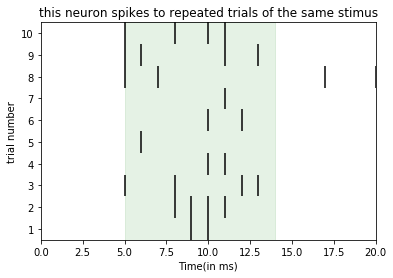

In [48]:
plt.subplot(1,1,1)
for trial in range(len(ten_spike_trains)):
    spike_time = [i for i, x in enumerate(ten_spike_trains[trial]) if x == 1]
    plt.vlines(spike_time, trial, trial + 1)
plt.axvspan(5, 14, alpha = 0.1, color='g')
plt.xlim([0,20])
plt.ylim([0,10])
plt.title('this neuron spikes to repeated trials of the same stimus')
plt.xlabel('Time(in ms)')
plt.ylabel('trial number')
plt.yticks([x + 0.5 for x in range(10)], [str(x + 1) for x in range(10)])